<h1>Table of Contents<span class="tocSkip"></span></h1>
<div class="toc"><ul class="toc-item"><li><span><a href="#Fishyscapes-Web-Validation-Data" data-toc-modified-id="Fishyscapes-Web-Validation-Data-1">Fishyscapes Web Validation Data</a></span><ul class="toc-item"><li><span><a href="#Accessing-and-Visualizing-the-Dataset" data-toc-modified-id="Accessing-and-Visualizing-the-Dataset-1.1">Accessing and Visualizing the Dataset</a></span></li></ul></li><li><span><a href="#Accessing-Earlier-Versions-of-the-Data" data-toc-modified-id="Accessing-Earlier-Versions-of-the-Data-2">Accessing Earlier Versions of the Data</a></span></li></ul></div>

# Fishyscapes Web Validation Data

Fishyscapes is a benchmark for anomaly detection in semantic segmentation. The benchmark is available as part of the **Bayesian Deep Learning Benchmarks** (BDL Benchmarks or `bdlb` for short). BDL Benchmarks is an open-source framework that aims to bridge the gap between the design of deep probabilistic machine learning models and their application to real-world problems, hosted on [GitHub](https://github.com/OATML/bdl-benchmarks).

This notebook gives an overview of the **validation data for the dynamic FS Web datset**. The FS Web Dataset is regularly updated. The validation data presented here is generated with the same image blending mechanisms, but instead of using data from the web it uses objects from PASCAL VOC. The dataset is intended to illustrate blending changes as the dataset evolves and enable contributors to test their methods on a dataset that is closer to the FS Web data.

<table class="tfo-notebook-buttons" align="left">
  <td>
    <a target="_blank" href="https://colab.research.google.com/github/hermannsblum/bdl-benchmark/blob/master/notebooks/fishyscapes web validation data.ipynb"><img src="https://www.tensorflow.org/images/colab_logo_32px.png" />Run in Google Colab</a>
  </td>
  <td>
    <a target="_blank" href="https://github.com/hermannsblum/bdl-benchmark/blob/master/notebooks/fishyscapes web validation data.ipynb"><img src="https://www.tensorflow.org/images/GitHub-Mark-32px.png" />View source on GitHub</a>
  </td>
</table>

In [0]:
#@title Dependencies & Prerequisites
!pip3 install --quiet tensorflow-gpu
!pip3 install --quiet --upgrade git+https://github.com/hermannsblum/bdl-benchmark.git

In [1]:
#@title Imports and Setup
import bdlb
import matplotlib.pyplot as plt
import numpy as np
%matplotlib inline

def visualize_tfdataset(tfdataset, num_samples):
  """Visualizes `num_samples` from the `tfdataset`."""
  
  fig, axs = plt.subplots(num_samples, 2, figsize=(15, 4*num_samples))
  for i, blob in enumerate(tfdataset.take(num_samples)):
    image = blob['image_left'].numpy()
    mask = blob['mask'].numpy()
    axs[i][0].imshow(image.astype('int'))
    axs[i][0].axis("off")
    axs[i][0].set(title="Image")
    # map 255 to 2 such that difference between labels is better visible
    mask[mask == 255] = 2
    axs[i][1].imshow(mask[..., 0])
    axs[i][1].axis("off")
    axs[i][1].set(title="Mask")
  fig.show()

In [2]:
fs = bdlb.load(benchmark="fishyscapes")

## Accessing and Visualizing the Dataset

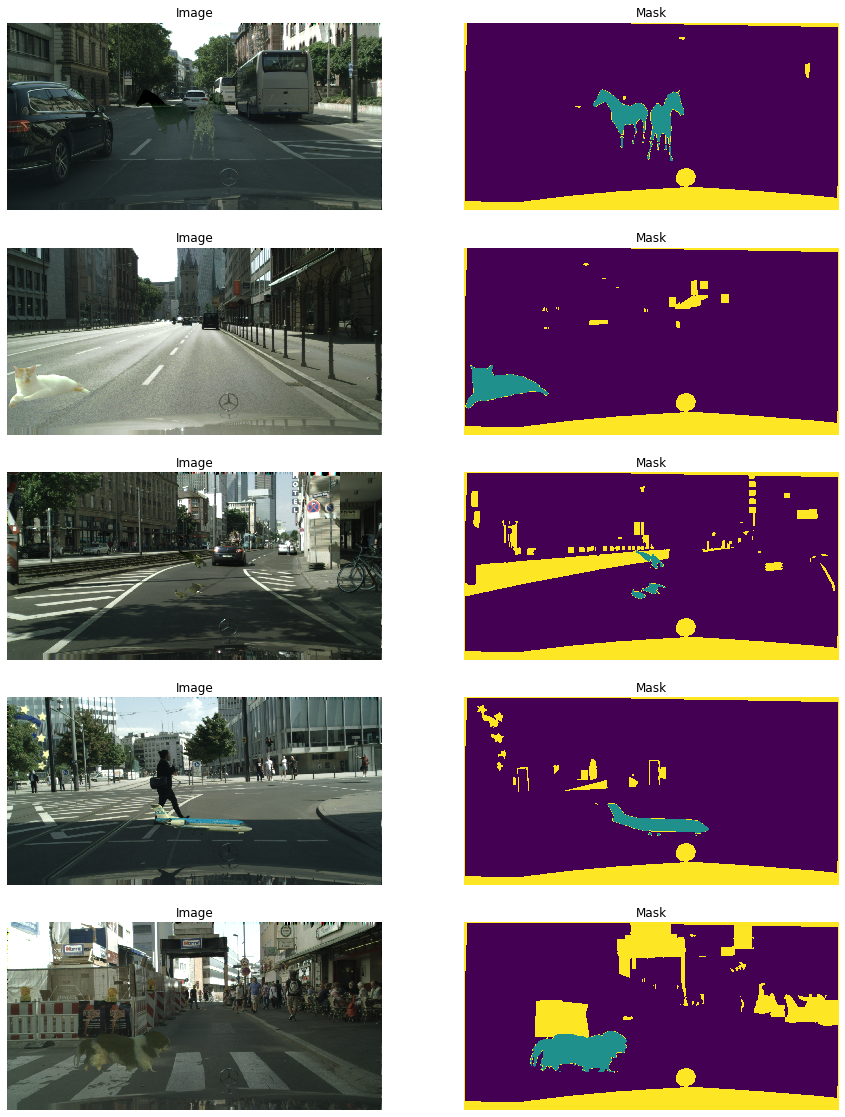

In [3]:
# load the dataset, there is only a validation dataset
ds = fs.get_dataset('Static')
visualize_tfdataset(ds, 5)

There are 3 different labels in the Fishyscapes Lost & Found dataset:  
- anomaly (any anomalous object)
- in-distribution (any object or background class that fits into one of the definitions of the [cityscapes classes](https://www.cityscapes-dataset.com/dataset-overview/#labeling-policy))
- void (does not exactly fit to cityscapes classes, but could still be found in cityscapes training images, most often labelled also as void there).

The images were labelled to strictly satisfy the definitions of the first two classes. Applying a coarse labelling that means that some pixels that are labelled void can also belong to the first two classes. In evaluation, we ignore all pixels that are labelled as void.

# Accessing Earlier Versions of the Data
The following versions are available:

In [26]:
for n, bc in bdlb.fishyscapes.fishyscapes_tfds.Fishyscapes().builder_configs.items(): 
    for version in (bc.version, *bc.supported_versions):
        print('Data Config "{0}": Version {1[0]}.{1[1]}.{1[2]}, {2}'.format(
            n, version.tuple, version.description or ''))

Data Config "Lost and Found": Version 1.0.0, 
Data Config "Static": Version 2.0.0, improved blending since june 2019
Data Config "Static": Version 1.0.0, version of march 2019


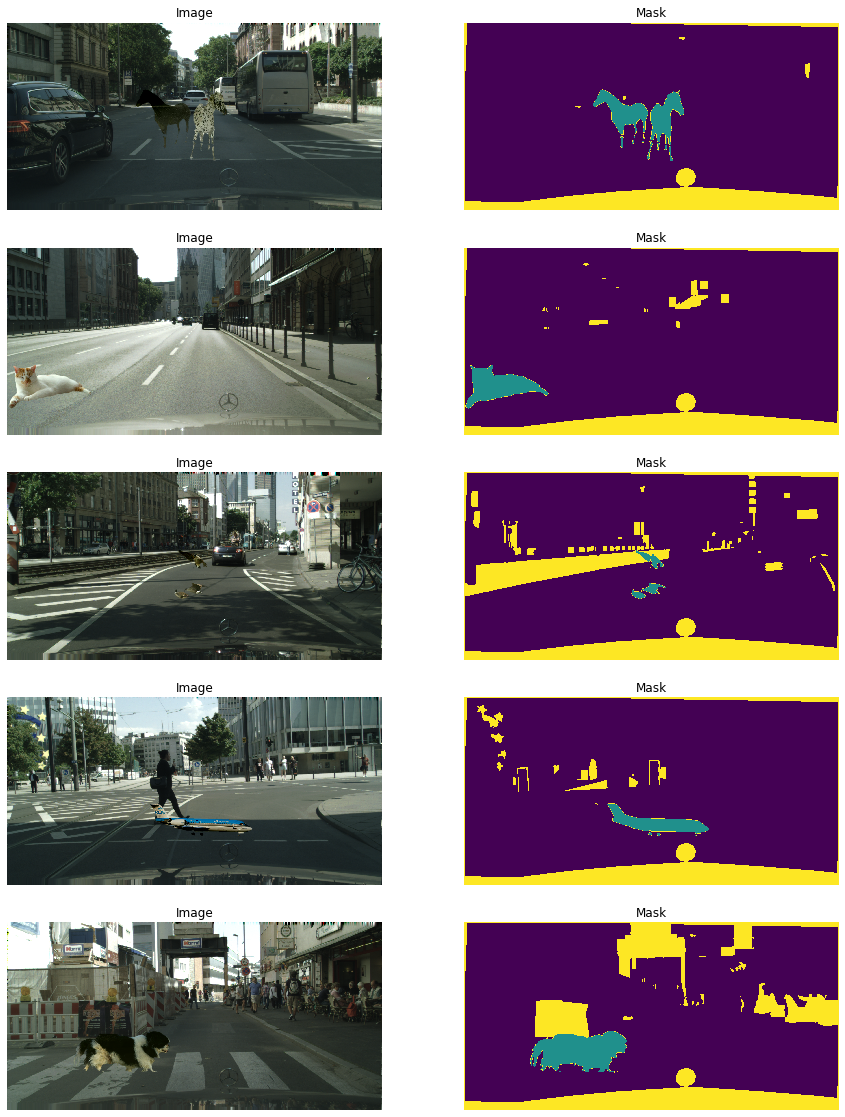

In [4]:
# load earlier versions of the validation data
ds = fs.get_dataset('Static:1.0.0')
visualize_tfdataset(ds, 5)